# 1. Preliminaries

Set working directory

In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/home/romagnolilab/Documents/GitHub/TEPaat'

Load Dependables

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap as ump

2023-03-27 09:12:37.276006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 09:12:37.311004: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from src.data_preprocess import DataPreprocessing
from src.dimensionality import DimensionalityReduction


Load Data

In [4]:
pathX = "data/raw/RawData.xlsx"

preprocess = DataPreprocessing()
data = preprocess.load_data(pathX, target_path = None, is_dataframe = True, justFeatures = False)

In [5]:
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


Transform Data

In [6]:
norm_data = preprocess.scale_data()
norm_data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,0.350968,0.292521,0.238525,0.468659,0.777944,0.757940,0.516965,0.493909,0.450876,0.240103,...,0.266622,0.464588,0.0,0.241389,0.277760,0.580246,0.0,0.788559,0.310381,0.0
1,0.350702,0.308210,0.297161,0.459386,0.788652,0.739205,0.521489,0.509693,0.256541,0.238025,...,0.266895,0.470400,0.0,0.240813,0.280527,0.578484,0.0,0.769701,0.246380,0.0
2,0.350251,0.459634,0.209477,0.479083,0.778920,0.784015,0.529546,0.463563,0.609511,0.247526,...,0.267055,0.473396,0.0,0.250898,0.282877,0.586596,0.0,0.772480,0.194822,0.0
3,0.352372,0.300972,0.251013,0.442794,0.727265,0.789300,0.533128,0.363171,0.393308,0.267338,...,0.267687,0.476511,0.0,0.268356,0.278263,0.568077,0.0,0.771891,0.172568,0.0
4,0.350848,0.234122,0.252805,0.514226,0.781072,0.752830,0.536877,0.428209,0.375227,0.286009,...,0.263968,0.486108,0.0,0.289550,0.276511,0.576815,0.0,0.791836,0.218329,0.0


In [7]:
# save model
preprocess.save_model(filename = "scaler_MinMax")

# 2. Dimensionality Reduction -  UMAP

In [8]:
dreduction = DimensionalityReduction(data = norm_data, n_comp = 2)

In [9]:
umap_2D_data = dreduction.fit_UMAP(state = 16)

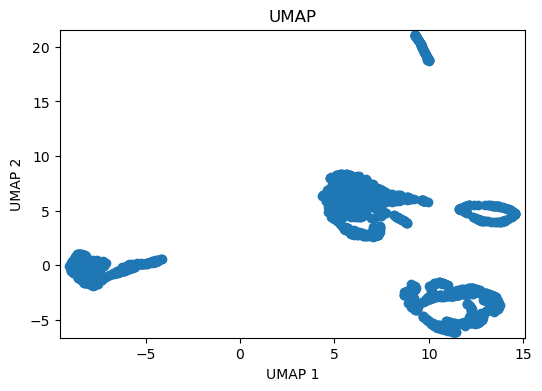

In [10]:
dreduction.plot_2D_scatter(data = umap_2D_data, type = 'UMAP')

In [11]:
# save model
dreduction.save_model(filename = "umap")

# 3. Clustering

In [11]:
from src.clustering import ClusterAnalysis


In [12]:
UMAP = ClusterAnalysis(clusters = 5, data = umap_2D_data)

### 3.1 KMEans

In [13]:
# fit data and predict cluster
kmeans_UMAP_2D_data = UMAP.create_KMeans(state = 1, init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


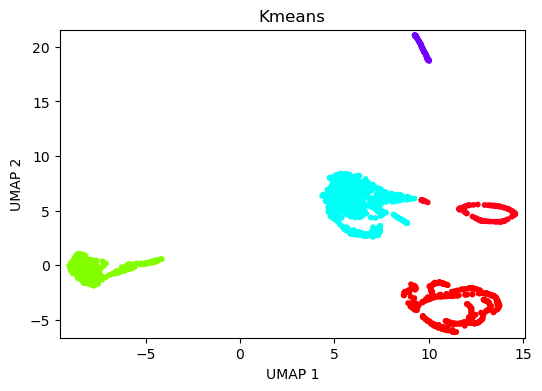

In [14]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'Kmeans'])

In [15]:
# save model
UMAP.save_model(filename = "Kmeans", DR = 'umap')

### 3.2 AgglomerativeClustering

In [16]:
# fit data and predict cluster
aggloClust_UMAP_2D_data = UMAP.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


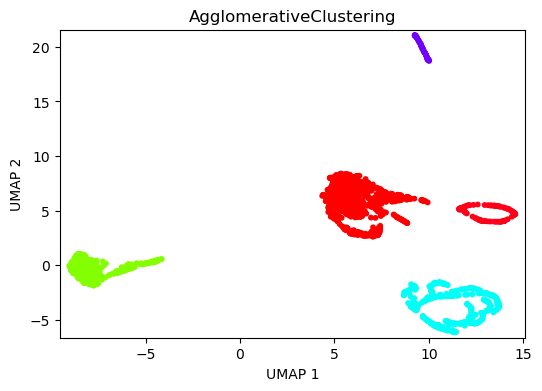

In [17]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'AgglomerativeClustering'])

In [18]:
# save model
UMAP.save_model(filename = "AgglomerativeClustering", DR = 'umap')

### 3.3 DBSCAN

In [19]:
# fit data and predict cluster
dbscan_with_UMAP = UMAP.create_DBSCAN(eps_ = 0.5, min_sample_ = 5)


Estimated number of clusters: 5
Estimated number of noise points: 0


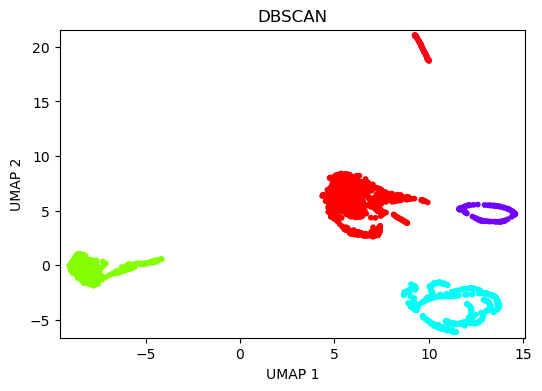

In [20]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'DBSCAN'])

In [21]:
# save model
UMAP.save_model(filename = "DBSCAN", DR = 'umap')

### 3.4 HDBSCAN

In [22]:
# fit data and predict cluster
hdbscan_UMAP_2D_data = UMAP.create_HDBSCAN(min_cluster_size_ = 5, min_samples_ = 15)

Estimated number of clusters: 5
Estimated number of noise points: 0


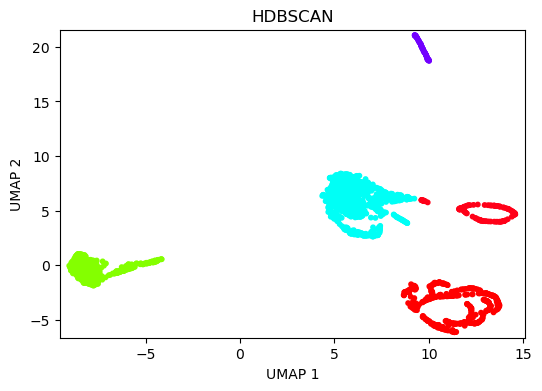

In [23]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'HDBSCAN'])

In [24]:
# save model
UMAP.save_model(filename = "HDBSCAN", DR = 'umap')

# Comparison

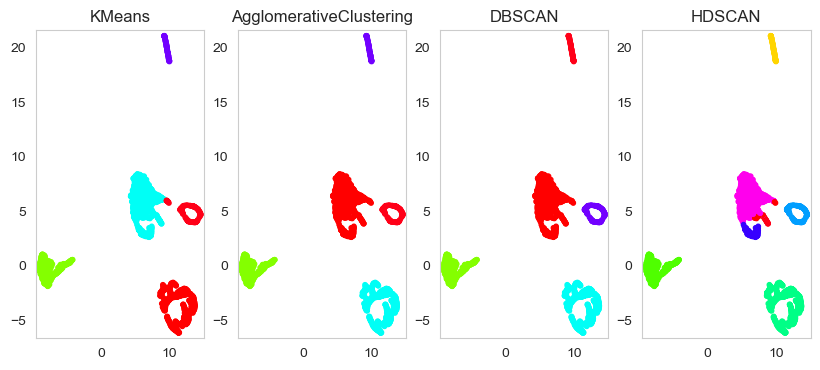

<Figure size 640x480 with 0 Axes>

In [25]:
UMAP.compare_cluster(fig_size = (10, 4), type = 'UMAP')

In [26]:
from sklearn.metrics import davies_bouldin_score

input = umap_2D_data
cluster_list = ['KMeans', 'Agglom', 'DBSCAN', 'HDBSCAN']
data_list = [kmeans_UMAP_2D_data, aggloClust_UMAP_2D_data, dbscan_with_UMAP, hdbscan_UMAP_2D_data]

for title, data_ in zip(cluster_list, data_list):
    print(f"Type: {title}, score: {davies_bouldin_score(X = input, labels = data_)}")

Type: KMeans, score: 0.32389420612093095
Type: Agglom, score: 0.2977308308300886
Type: DBSCAN, score: 0.2977308308300886
Type: HDBSCAN, score: 0.7300577820329606


# 4. Classification 

In [27]:
from src.classification import Classifier

## 4.1 ANN

### 4.1.1 Agglomerative Clustering Data

In [28]:
# create a ANN with aggloclust
ANN_aggloClust  = Classifier(features = umap_2D_data, labels = aggloClust_UMAP_2D_data, testratio = 0.2, state = 42)


In [29]:
# fit ANN
ANN_aggloClust.fit_ANN(n_hidden = 2)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        17

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 3, 0, 2, 2, 1, 2, 0, 0, 1, 2,
       0, 2, 1, 0, 1, 0, 0, 4, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 4, 2, 1, 2, 1, 1, 2, 0, 1,
       2, 0, 4, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       4, 2, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 0, 2, 3, 0, 0, 3, 4, 1, 2, 0, 2, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 4, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 4, 4, 0, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 3, 0, 2, 3, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 4, 3, 2, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2,
       2, 0, 1, 0, 0, 3, 1, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 4, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 3, 3, 4, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 3, 1, 1, 1, 2, 1, 0, 3, 0, 2, 0, 1, 0, 2, 1,
       1, 2, 0, 4, 2, 0, 0, 1, 2, 0, 2, 0, 1, 4, 0,

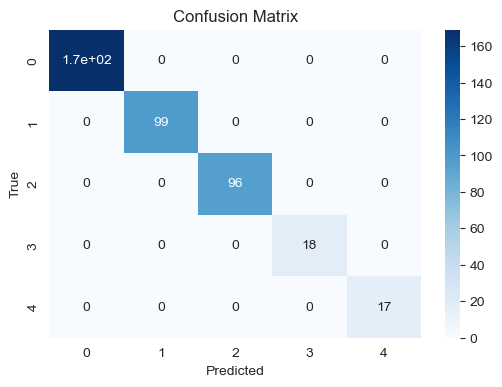

In [30]:
# show confusion matrix
ANN_aggloClust.confusion_matrix()

In [31]:
!pwd

/home/romagnolilab/Documents/GitHub/PROJECT


In [32]:
# save model
ANN_aggloClust.save_model(filename = "ANN_aggloClust_classifier")

#### Test effect of hidden layer on model performance

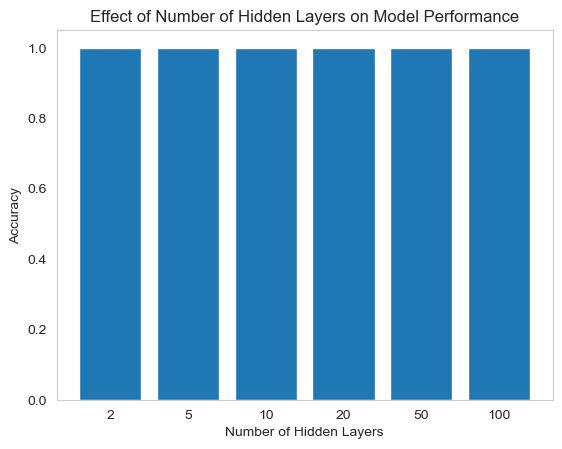

In [33]:
hidden_layers = [2, 5, 10, 20, 50, 100]

ANN_aggloClust.test_ANN_n_hidden(hidden_layers, learning_rate = 0.01, n_epochs = 1000, state = 42)


#### Test effect of learning rate on model performance

/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


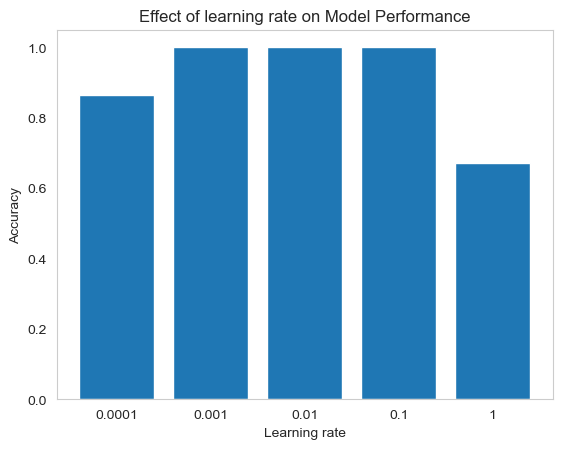

In [34]:
learning_rate = [1e-4, 1e-3, 1e-2, 0.1, 1]
ANN_aggloClust.test_ANN_learning_rate(hidden_layers = 2, learning_rate = learning_rate,  n_epochs = 1000, state = 42)

#### Test effect of Maximum number of iteration on model performance

/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

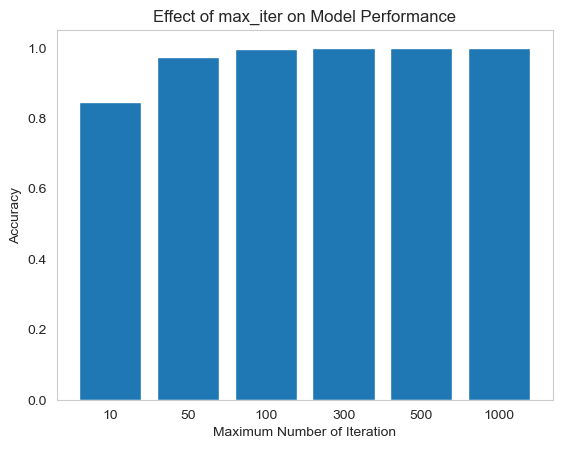

In [35]:
epochs = [10, 50, 100, 300, 500, 1000]
ANN_aggloClust.test_ANN_max_iter(hidden_layers  = 2, learning_rate = 0.01, n_epochs = epochs, state = 42)

#### Test effect of solver types on model performance

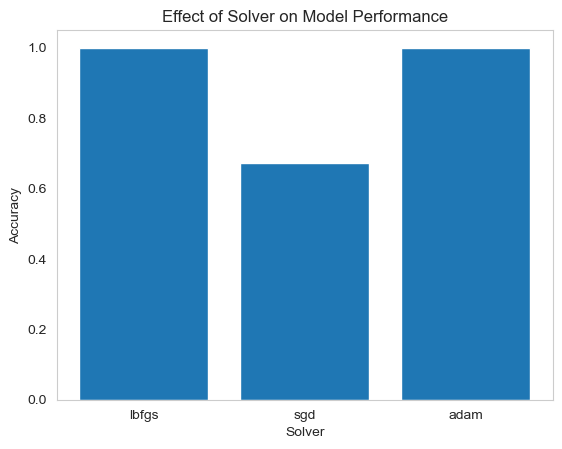

In [36]:
method = ['lbfgs', 'sgd', 'adam']
ANN_aggloClust.test_ANN_solver_algorithm(hidden_layers = 2, learning_rate = 0.01, n_epochs  = 1000, algorithm = method, state = 42)

### 4.1.2 DBSCAN Clustering Data

In [37]:
# create a ANN with aggloclust
ANN_DBSCAN  = Classifier(features = umap_2D_data, labels = dbscan_with_UMAP, testratio = 0.2, state = 42)


In [38]:
# fit ANN
ANN_DBSCAN.fit_ANN(n_hidden = 2)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        18

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 4, 0, 2, 2, 1, 2, 0, 0, 1, 2,
       0, 2, 1, 0, 1, 0, 0, 3, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 3, 2, 1, 2, 1, 1, 2, 0, 1,
       2, 0, 3, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       3, 2, 0, 1, 0, 0, 0, 0, 4, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 0, 2, 4, 0, 0, 4, 3, 1, 2, 0, 2, 4, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 4, 1, 1, 2, 1, 2, 1, 3, 3, 0, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 4, 0, 2, 4, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 3, 4, 2, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2,
       2, 0, 1, 0, 0, 4, 1, 4, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 4, 4, 3, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 4, 1, 1, 1, 2, 1, 0, 4, 0, 2, 0, 1, 0, 2, 1,
       1, 2, 0, 3, 2, 0, 0, 1, 2, 0, 2, 0, 1, 3, 0,

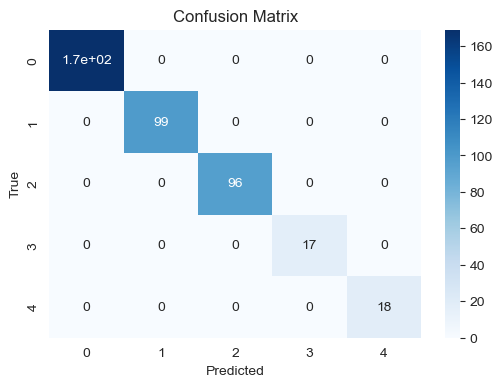

In [39]:
# show confusion matrix
ANN_DBSCAN.confusion_matrix()

In [40]:
# save model
ANN_DBSCAN.save_model(filename = "ANN_DBSCAN_classifier")

#### Test effect of hidden layer on model performance

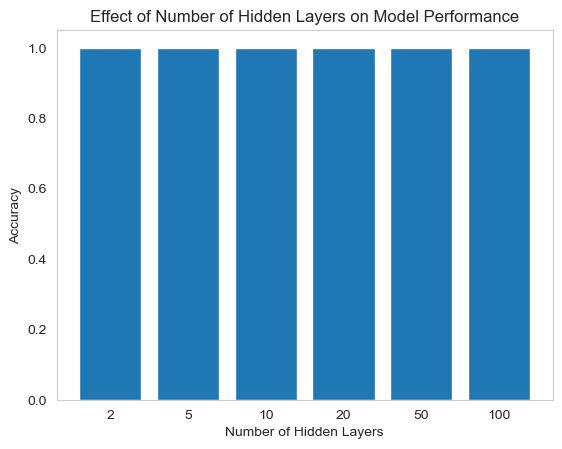

In [41]:
hidden_layers = [2, 5, 10, 20, 50, 100]

ANN_DBSCAN.test_ANN_n_hidden(hidden_layers, learning_rate = 0.01, n_epochs = 1000, state = 42)


#### Test effect of learning rate on model performance

/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


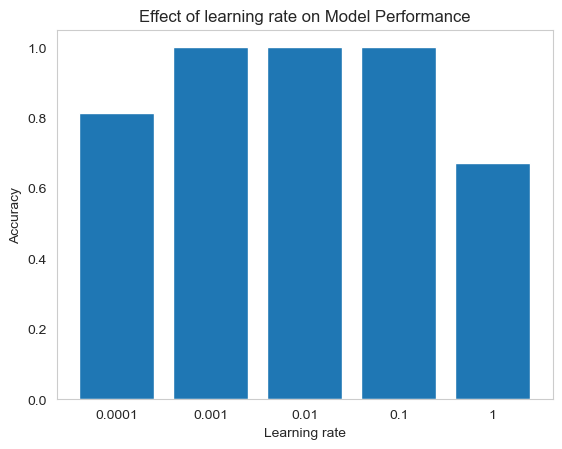

In [42]:
learning_rate = [1e-4, 1e-3, 1e-2, 0.1, 1]
ANN_DBSCAN.test_ANN_learning_rate(hidden_layers = 2, learning_rate = learning_rate,  n_epochs = 1000, state = 42)

#### Test effect of Maximum number of iteration on model performance

/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

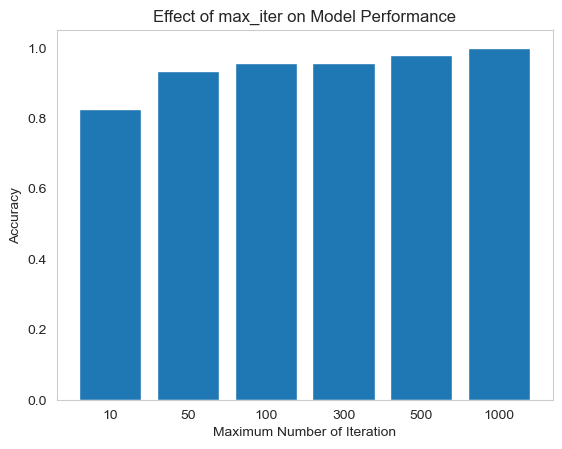

In [43]:
epochs = [10, 50, 100, 300, 500, 1000]
ANN_DBSCAN.test_ANN_max_iter(hidden_layers  = 2, learning_rate = 0.01, n_epochs = epochs, state = 42)

#### Test effect of solver types on model performance

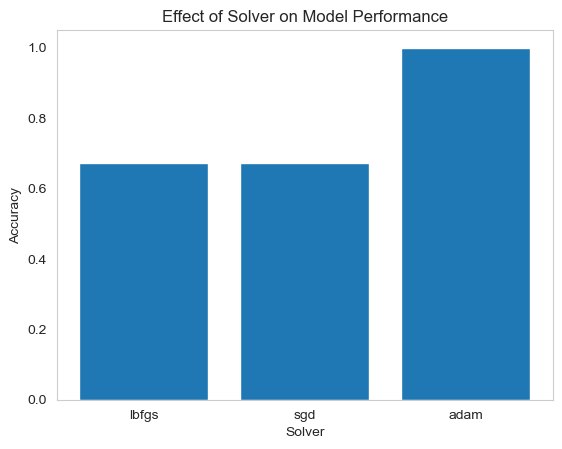

In [44]:
method = ['lbfgs', 'sgd', 'adam']
ANN_DBSCAN.test_ANN_solver_algorithm(hidden_layers = 2, learning_rate = 0.01, n_epochs  = 1000, algorithm = method, state = 42)

## 4.2 SVM

### 4.2.1 Agglomerative Clustering Data

In [45]:
# create a ANN with aggloclust
SVC_aggloClust  = Classifier(features = umap_2D_data, labels = aggloClust_UMAP_2D_data, testratio = 0.2, state = 42)

In [46]:
# fit SVC
SVC_aggloClust.fit_SVC(C_ = 1.0, kernel_ = 'rbf')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        17

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 3, 0, 2, 2, 1, 2, 0, 0, 1, 2,
       0, 2, 1, 0, 1, 0, 0, 4, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 4, 2, 1, 2, 1, 1, 2, 0, 1,
       2, 0, 4, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       4, 2, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 0, 2, 3, 0, 0, 3, 4, 1, 2, 0, 2, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 4, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 4, 4, 0, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 3, 0, 2, 3, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 4, 3, 2, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2,
       2, 0, 1, 0, 0, 3, 1, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 4, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 3, 3, 4, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 3, 1, 1, 1, 2, 1, 0, 3, 0, 2, 0, 1, 0, 2, 1,
       1, 2, 0, 4, 2, 0, 0, 1, 2, 0, 2, 0, 1, 4, 0,

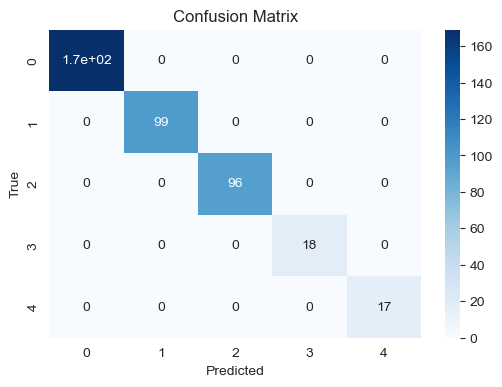

In [47]:
# show confusion matrix
SVC_aggloClust.confusion_matrix()

In [48]:
# save model
SVC_aggloClust.save_model(filename = "SVC_aggloClust_classifier")

#### Test effect of kernel on model performance

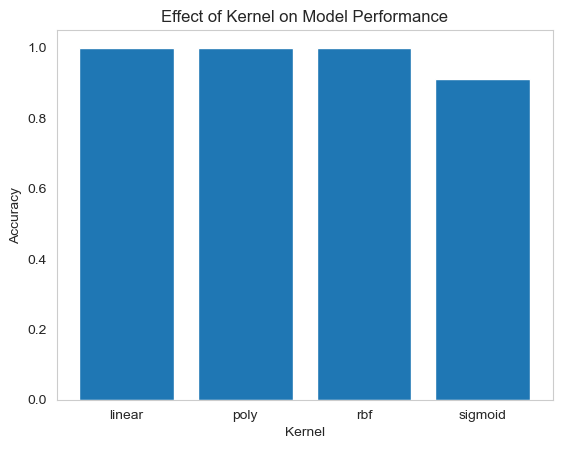

In [49]:
ken = ['linear', 'poly', 'rbf', 'sigmoid']
SVC_aggloClust.test_SVC_kernel(kernel_ = ken, C_ = 1.0)

#### Test effect of Regularization parameter

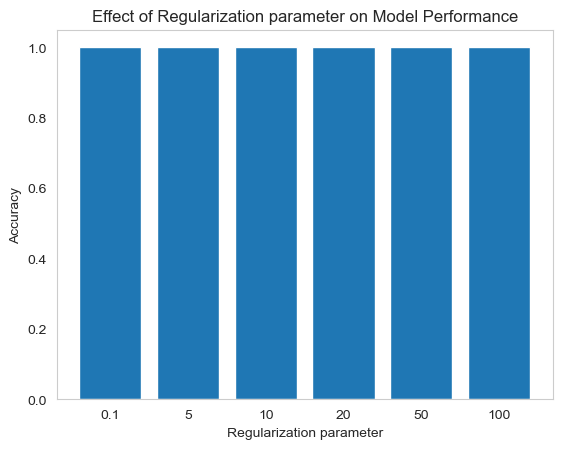

In [50]:
c = [0.1, 5, 10, 20, 50, 100]
SVC_aggloClust.test_SVC_Regularization(C_ = c, kernel_ = 'rbf')

### 4.2.2 DBSCAN Clustering Data

In [51]:
# create a SVC with DBSCAN
SVC_DBSCAN  = Classifier(features = umap_2D_data, labels = dbscan_with_UMAP, testratio = 0.2, state = 42)

In [52]:
# fit SVC
SVC_DBSCAN.fit_SVC(C_ = 1.0, kernel_ = 'rbf')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        18

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 4, 0, 2, 2, 1, 2, 0, 0, 1, 2,
       0, 2, 1, 0, 1, 0, 0, 3, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 3, 2, 1, 2, 1, 1, 2, 0, 1,
       2, 0, 3, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       3, 2, 0, 1, 0, 0, 0, 0, 4, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 0, 2, 4, 0, 0, 4, 3, 1, 2, 0, 2, 4, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 4, 1, 1, 2, 1, 2, 1, 3, 3, 0, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 4, 0, 2, 4, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 3, 4, 2, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2,
       2, 0, 1, 0, 0, 4, 1, 4, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 4, 4, 3, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 4, 1, 1, 1, 2, 1, 0, 4, 0, 2, 0, 1, 0, 2, 1,
       1, 2, 0, 3, 2, 0, 0, 1, 2, 0, 2, 0, 1, 3, 0,

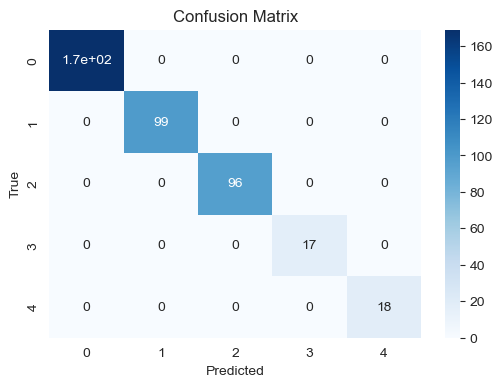

In [53]:
# show confusion matrix
SVC_DBSCAN.confusion_matrix()

In [54]:
# save model
SVC_DBSCAN.save_model(filename = "SVC_DBSCAN_classifier")

#### Test effect of kernel on model performance

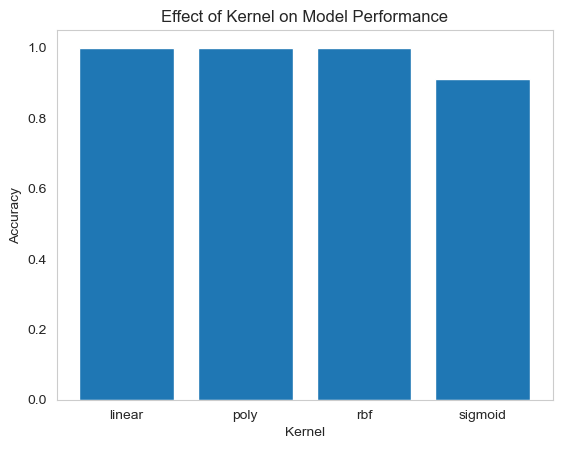

In [55]:
ken = ['linear', 'poly', 'rbf', 'sigmoid']
SVC_DBSCAN.test_SVC_kernel(kernel_ = ken, C_ = 1.0)

#### Test effect of Regularization parameter

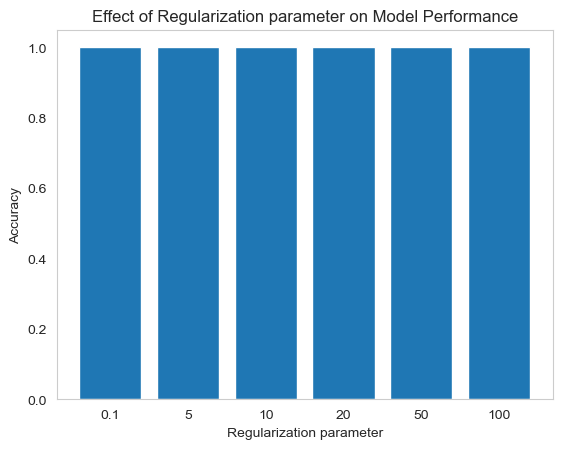

In [56]:
c = [0.1, 5, 10, 20, 50, 100]
SVC_DBSCAN.test_SVC_Regularization(C_ = c, kernel_ = 'rbf')